In [1]:
#******************************************************************************************************** *#
# Implementation of a simple Quantum Circuit on Qiskit
#******************************************************************************************************** *#
#
#******************************************************************************************************** *#
# Prof. Gustavo Patino
# adolfo.patino@udea.edu.co
# Quantum Machine Learning Workshop at the IEEE-SSCI 2023.
# Mexico City - Mexico
# December 2023
#******************************************************************************************************** *#

## 1. Imports

In [2]:
#from ibm_quantum_widgets import CircuitComposer
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi

In [3]:
from qiskit import IBMQ, QuantumCircuit, Aer, assemble, execute
import numpy as np
from qiskit.visualization import plot_histogram, plot_bloch_multivector

In [4]:
# Descomente la siguiente linea si desea ver las imágenes más grandes.
%config InlineBackend.figure_format = 'svg' # Makes the images look nice

## 2. Chossing a Qiskit backend or Qiskit simulator

In [5]:
sim = Aer.get_backend('aer_simulator')

## 3. Defining the Quantum Circuit

In [6]:
qreg_q = QuantumRegister(3, 'q')
creg_c = ClassicalRegister(3, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

In [7]:
circuit.h(qreg_q[1])
circuit.h(qreg_q[2])
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2])
circuit.rx(pi / 5, qreg_q[0])
circuit.ry(pi / 3, qreg_q[1])
circuit.ry(pi / 5, qreg_q[2])
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2])
circuit.cx(qreg_q[1], qreg_q[2])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2])

## 4. Looking for the unitary matrix representation of our quantum circuit

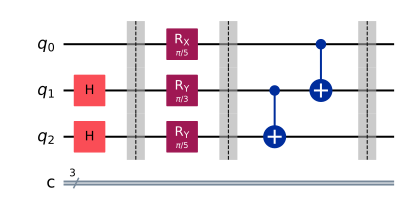

In [8]:
circuit_unitary = circuit.copy()
circuit_unitary.draw('mpl', style='iqx')

In [9]:
circuit_unitary.save_unitary()
qobj = assemble(circuit_unitary)

In [10]:
# Simulating the circuit to obtain its matrix representation

result = sim.run(circuit_unitary).result()

In [11]:
unitary = result.get_unitary() # This is the circuit matrix.

In [12]:
# In Jupyter Notebooks we can display this nicely using Latex.
# If not using Jupyter Notebooks you may need to remove the 
# array_to_latex function and use print(unitary) instead.

from qiskit.visualization import array_to_latex
array_to_latex(unitary, prefix="\\text{Circuit = }\n")

<IPython.core.display.Latex object>

## 5. Looking for the output vector state of our circuit

In [13]:
circuit_vector  = circuit.copy()

circuit_vector.save_statevector()
qobj2 = assemble(circuit_vector)

In [14]:
# Simulating the circuit to obtain its output vector state

result2 = sim.run(circuit_vector).result()
statevector2 = result2.get_statevector()

In [15]:
array_to_latex(statevector2, prefix="\\text{Output statevector = }")

<IPython.core.display.Latex object>

In [16]:
circuit.measure(qreg_q[2], creg_c[2])
circuit.measure(qreg_q[1], creg_c[1])
circuit.measure(qreg_q[0], creg_c[0])

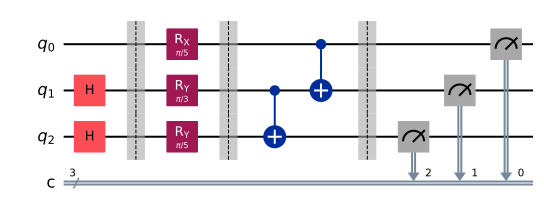

In [17]:
circuit.draw('mpl', style='iqx', filename='QuantumCircuit.png', )

## 6. Final simulation of the quantum circuit

In [18]:
job = execute(circuit, sim, shots=8192)  # shots default = 1024
result = job.result()

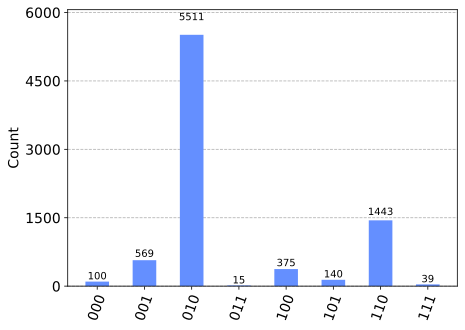

In [19]:
data = result.get_counts(circuit)
plot_histogram(data)

## 7. Running your Quantum Circuit on a Real Quantum Processor

In [20]:
# With a IBM Quantum free account, you can run your circuits on a 127 qubits real quantum processor. 

#from qiskit_ibm_provider import IBMProvider
#from qiskit.providers.ibmq import least_busy

# Save your credentials on disk.
# IBMProvider.save_account(token='<IBM Quantum API key>')

#provider = IBMProvider(instance='ibm-q/open/main')

#backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 3 
#                                       and not x.configuration().simulator 
#                                       and x.status().operational==True))
#print("least busy backend: ", backend)

In [21]:
#job2 = execute(circuit, backend, shots=1024)  # shots default = 1024
#result2 = job2.result()

In [22]:
#data2 = result2.get_counts(circuit)
#plot_histogram(data2)

In [23]:
import qiskit.tools.jupyter
%qiskit_version_table